In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import joblib


In [16]:
df = pd.read_csv("C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/data_cleaned.csv")

In [17]:
#winner variable value counts
print(df['Winner'].value_counts())

Winner
0    4722
1    2631
Name: count, dtype: int64


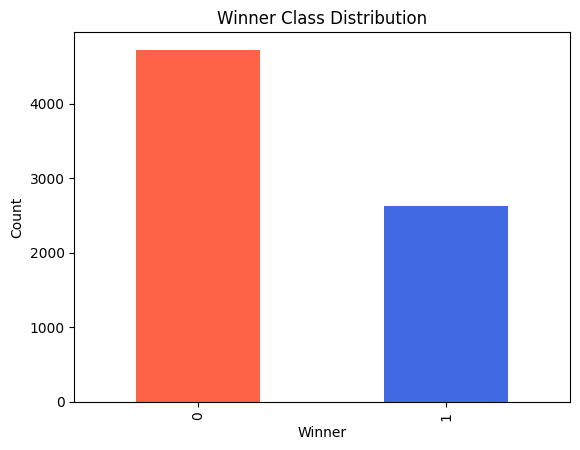

In [18]:
#plot to describe the winner feature class, 0 being red and 1 being blue and yellow being draw

df['Winner'].value_counts().plot(kind='bar', color=['tomato', 'royalblue', 'yellow'])
plt.title('Winner Class Distribution')
plt.xlabel('Winner')
plt.ylabel('Count')
plt.show()

In [19]:
df.value_counts()

Winner  title_bout  no_of_rounds  B_avg_KD  B_avg_opp_KD  B_avg_SIG_STR_pct  B_avg_opp_SIG_STR_pct  B_avg_TD_pct  B_avg_opp_TD_pct  B_avg_SUB_ATT  B_avg_opp_SUB_ATT  B_avg_REV  B_avg_opp_REV  B_avg_SIG_STR_att  B_avg_SIG_STR_landed  B_avg_opp_SIG_STR_att  B_avg_opp_SIG_STR_landed  B_avg_TOTAL_STR_att  B_avg_TOTAL_STR_landed  B_avg_opp_TOTAL_STR_att  B_avg_opp_TOTAL_STR_landed  B_avg_TD_att  B_avg_TD_landed  B_avg_opp_TD_att  B_avg_opp_TD_landed  B_avg_HEAD_att  B_avg_HEAD_landed  B_avg_opp_HEAD_att  B_avg_opp_HEAD_landed  B_avg_BODY_att  B_avg_BODY_landed  B_avg_opp_BODY_att  B_avg_opp_BODY_landed  B_avg_LEG_att  B_avg_LEG_landed  B_avg_opp_LEG_att  B_avg_opp_LEG_landed  B_avg_DISTANCE_att  B_avg_DISTANCE_landed  B_avg_opp_DISTANCE_att  B_avg_opp_DISTANCE_landed  B_avg_CLINCH_att  B_avg_CLINCH_landed  B_avg_opp_CLINCH_att  B_avg_opp_CLINCH_landed  B_avg_GROUND_att  B_avg_GROUND_landed  B_avg_opp_GROUND_att  B_avg_opp_GROUND_landed  B_avg_CTRL_time(seconds)  B_avg_opp_CTRL_time(seconds)

<Axes: >

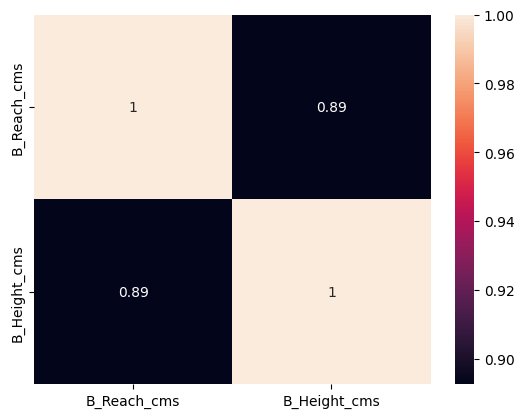

In [20]:
#plot showing correlation between B_Reach and B_Height_cms
#correlation plot betweeen B_Reach and B_Height_cms

sns.heatmap(df[["B_Reach_cms", "B_Height_cms"]].corr(), annot=True)

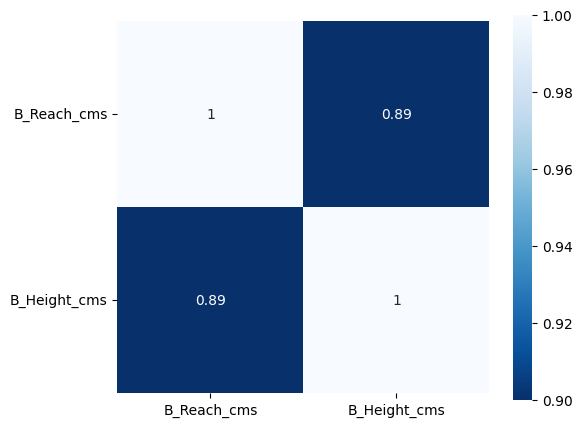

In [21]:
corr = np.array([[1, 0.89],
                 [0.89, 1]])

# Plotting the heatmap with a sky blue and white color palette
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='Blues_r', vmin=0.9, vmax=1, square=True)
plt.xticks([0.5, 1.5], ['B_Reach_cms', 'B_Height_cms'], rotation=0)
plt.yticks([0.5, 1.5], ['B_Reach_cms', 'B_Height_cms'], rotation=0)
plt.show()

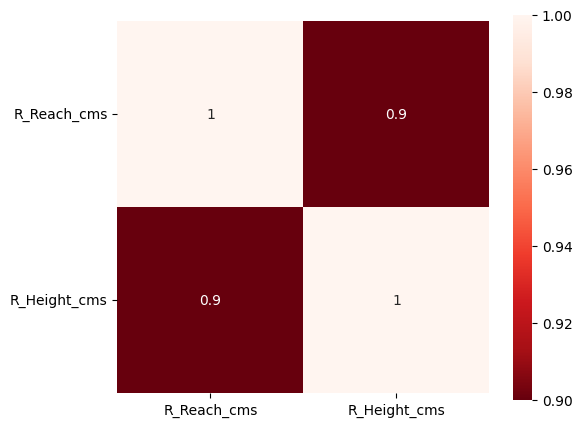

In [22]:
corr = np.array([[1, 0.9],
                 [0.9, 1]])

# Plotting the heatmap with a sky blue and white color palette
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='Reds_r', vmin=0.9, vmax=1, square=True)
plt.xticks([0.5, 1.5], ['R_Reach_cms', 'R_Height_cms'], rotation=0)
plt.yticks([0.5, 1.5], ['R_Reach_cms', 'R_Height_cms'], rotation=0)
plt.show()

In [23]:
#test train split with smote

X = df.drop('Winner', axis=1)
y = df['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

smote = SMOTE(sampling_strategy='minority')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#standard scaler
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)


In [24]:
rf_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [25]:
# #random forest classifier with grid search
# rf = RandomForestClassifier()
# rf_grid = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1)
# rf_grid.fit(X_train_smote, y_train_smote)

# print(rf_grid.best_params_)
# print(rf_grid.best_score_)
# print(rf_grid.best_estimator_)
# print(rf_grid.score(X_test, y_test))


In [26]:
# #random forest classifier with best params from grid search

# rf_grid_best = RandomForestClassifier(n_estimators=400, max_depth=None, min_samples_split=2, min_samples_leaf=1, bootstrap=False)
# rf_grid_best.fit(X_train_smote, y_train_smote)
# print(rf_grid_best.score(X_test, y_test))

# #confusion matrix
# y_pred = rf_grid_best.predict(X_test)
# print(confusion_matrix(y_test, y_pred))


In [27]:
#pivot table

# pivot_table = grouped_results.pivot_table(index='param_max_depth', columns='param_n_estimators', values='mean_test_score')

# sns.heatmap(pivot_table, annot=True, cmap="YlGnBu") 
# plt.title("Mean Test Scores by Max Depth and Number of Estimators")
# plt.show()

In [28]:
#sns.clustermap(pivot_table, cmap="YlGnBu")

In [29]:
#sns.scatterplot(data=results, x='param_n_estimators', y='mean_test_score', hue='param_max_depth')

In [30]:
# #pivot table for other parameters

# grouped_results = results.groupby(['param_min_samples_split', 'param_min_samples_leaf'])[['mean_test_score']].mean()

# pivot_table = grouped_results.pivot_table(index='param_min_samples_split', columns='param_min_samples_leaf', values='mean_test_score')

# sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
# plt.title("Mean Test Scores by Min Samples Split and Min Samples Leaf")
# plt.show()

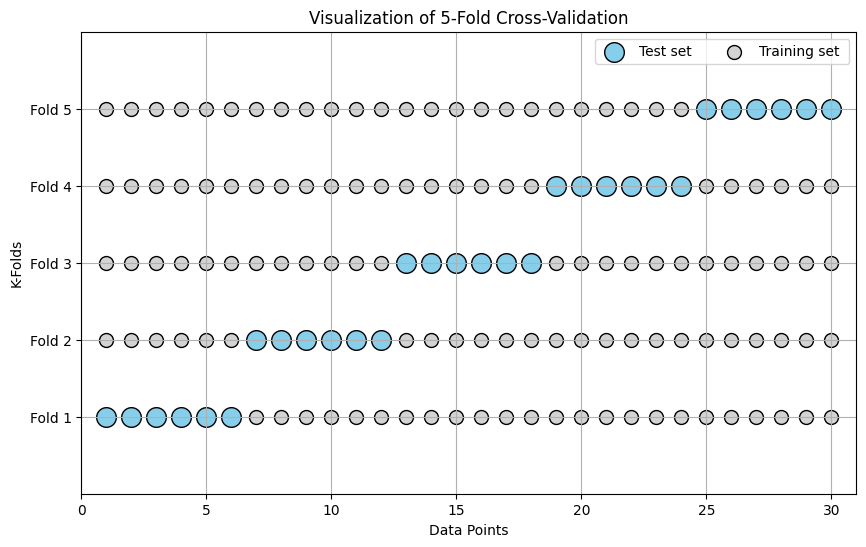

In [31]:
n_samples = 30  # Number of data points
k = 5  # Number of folds

X = np.arange(1, n_samples + 1)

fold_sizes = np.full(k, n_samples // k, dtype=int)
fold_sizes[:n_samples % k] += 1
current = 0

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, n_samples + 1)
ax.set_ylim(-1, k)
ax.set_yticks(np.arange(k))
ax.set_yticklabels([f"Fold {i + 1}" for i in range(k)])

for i in range(k):
    start, stop = current, current + fold_sizes[i]
    ax.scatter(X[start:stop], np.full(fold_sizes[i], i), s=200, edgecolor='k', facecolor='skyblue', label=f'Test set' if i == 0 else "")
    ax.scatter(np.concatenate((X[:start], X[stop:])), np.full(n_samples - fold_sizes[i], i), s=100, edgecolor='k', facecolor='lightgrey', label=f'Training set ' if i == 0 else "")
    current = stop

ax.set_xlabel("Data Points")
ax.set_ylabel("K-Folds")
ax.set_title(f"Visualization of {k}-Fold Cross-Validation")
ax.legend(loc='best', bbox_to_anchor=(1, 1), ncol=2)
ax.grid(True)

plt.show()

In [32]:
rf_grid = joblib.load("C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/DS-UoN-Sports-ML-bhamidipati/savedModels/best_model_rf.pkl")


[[1565  320]
 [ 184  873]]


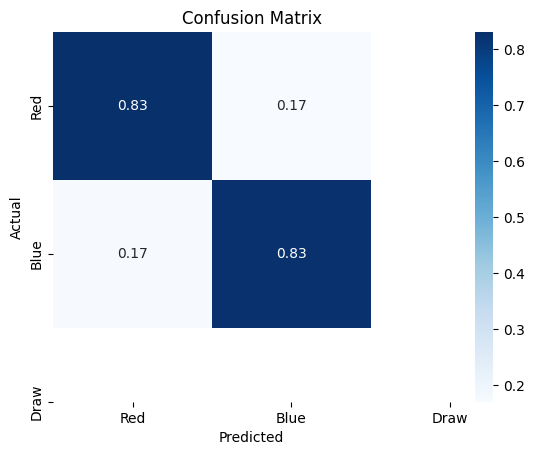

In [33]:
#predicting using the best model
y_pred_lr = rf_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred_lr))

#plotting the confusion matrix with percentages

cm = confusion_matrix(y_test, y_pred_lr)
cm = cm / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Red', 'Blue', 'Draw'], yticklabels=['Red', 'Blue', 'Draw'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [34]:
best_xgb = joblib.load("C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/DS-UoN-Sports-ML-bhamidipati/savedModels/best_model_xgb.pkl")

In [35]:
print(best_xgb.score(X_test, y_test))
print(confusion_matrix(y_test, best_xgb.predict(X_test)))

0.8422841604350781
[[1647  238]
 [ 226  831]]


[[1647  238]
 [ 226  831]]


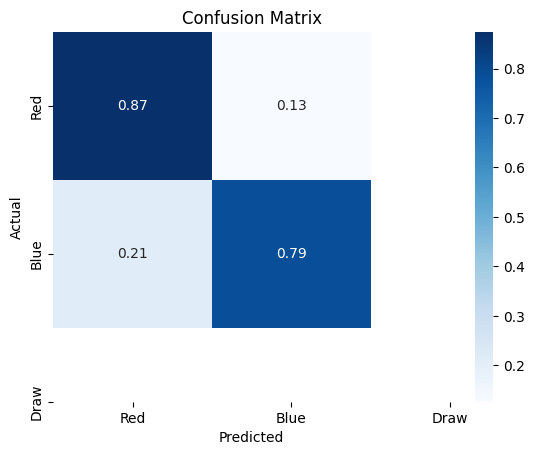

In [36]:
y_pred_xgb = best_xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred_xgb))

#plotting the confusion matrix with percentages

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb = cm_xgb / cm_xgb.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_xgb, annot=True, cmap='Blues', xticklabels=['Red', 'Blue', 'Draw'], yticklabels=['Red', 'Blue', 'Draw'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



CONFUSION MATRICES
-----------------------------------------------------------------------------

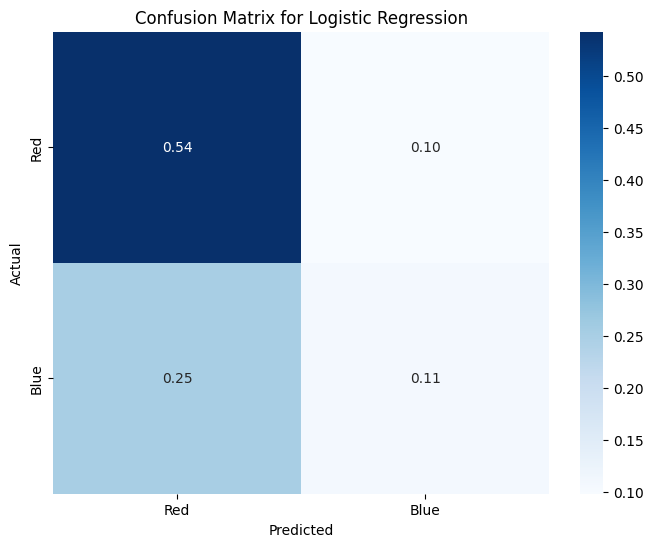

In [45]:
confusion_matrix_data = np.array([[1596, 289], 
                                  [739, 318]])

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_data / np.sum(confusion_matrix_data), annot=True, fmt='.2f', cmap='Blues', cbar=True)

plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Red', 'Blue'])
plt.yticks([0.5, 1.5], ['Red', 'Blue'])

plt.show()

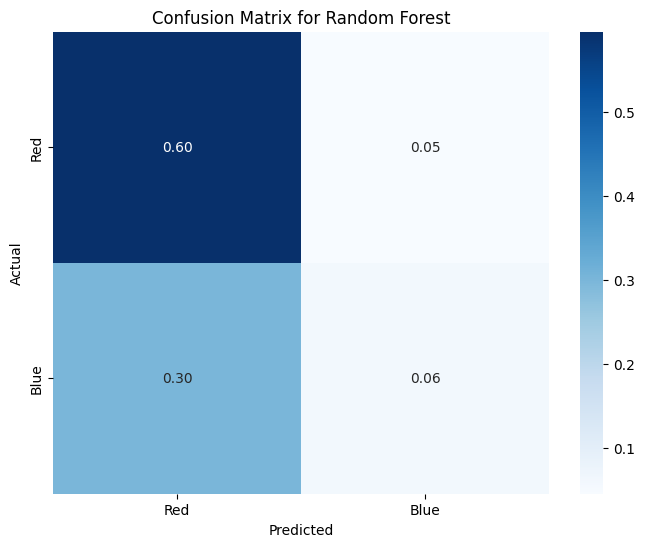

In [47]:
confusion_matrix_data = np.array([[1752, 133], 
                                  [884, 173]])

confusion_matrix_normalized = confusion_matrix_data / np.sum(confusion_matrix_data)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=True)

plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Red', 'Blue'])
plt.yticks([0.5, 1.5], ['Red', 'Blue'])

plt.show()

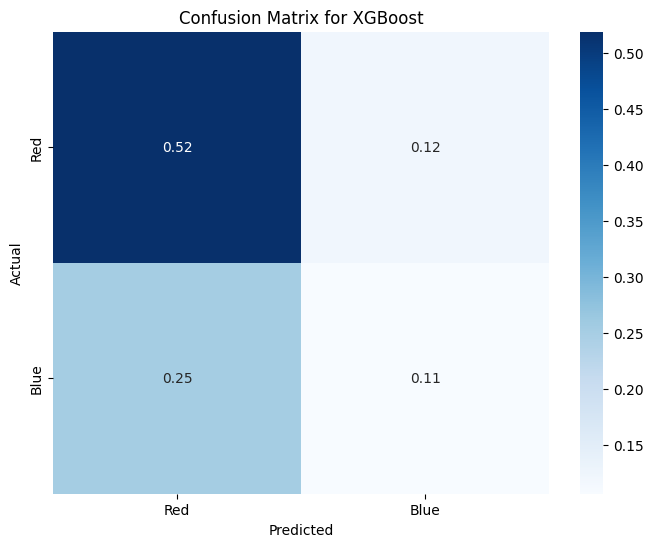

In [48]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix_data = np.array([[1527, 358], 
                                  [744, 313]])

# Normalize the confusion matrix
confusion_matrix_normalized = confusion_matrix_data / np.sum(confusion_matrix_data)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=True)

plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Red', 'Blue'])
plt.yticks([0.5, 1.5], ['Red', 'Blue'])

plt.show()


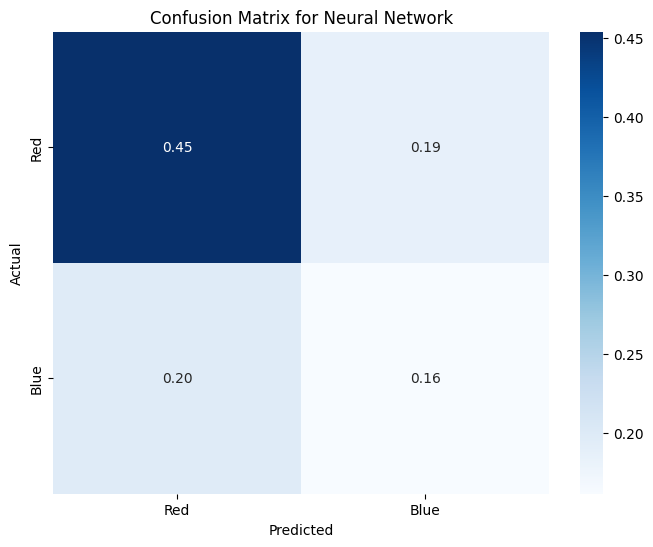

In [60]:
confusion_matrix_data = np.array([[1503, 617], 
                                  [655, 534]])

confusion_matrix_normalized = confusion_matrix_data / np.sum(confusion_matrix_data)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=True)

plt.title('Confusion Matrix for Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Red', 'Blue'])
plt.yticks([0.5, 1.5], ['Red', 'Blue'])

plt.show()

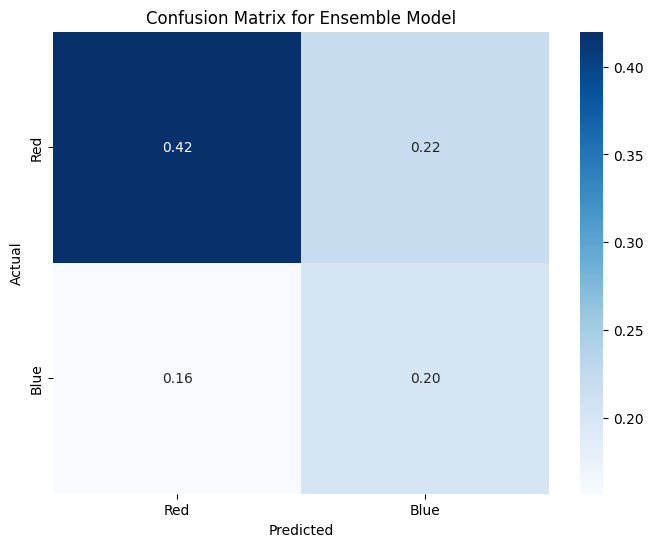

In [54]:
confusion_matrix_data = np.array([[1235, 650], 
                                  [462, 595]])

confusion_matrix_normalized = confusion_matrix_data / np.sum(confusion_matrix_data)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=True)

plt.title('Confusion Matrix for Ensemble Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Red', 'Blue'])
plt.yticks([0.5, 1.5], ['Red', 'Blue'])

plt.show()

NOW CONF MAT WITH SMOTE
---------------------------------

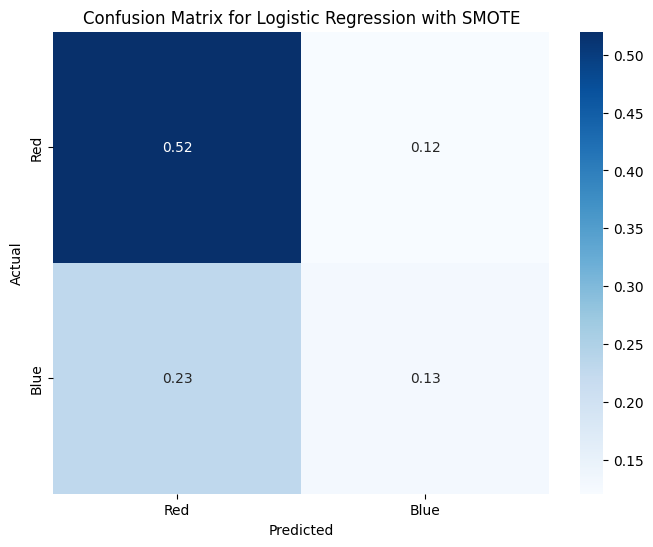

In [63]:


confusion_matrix_data = np.array([[1529, 356], 
                                  [675, 382]])

confusion_matrix_normalized = confusion_matrix_data / np.sum(confusion_matrix_data)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=True)

plt.title('Confusion Matrix for Logistic Regression with SMOTE') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Red', 'Blue'])
plt.yticks([0.5, 1.5], ['Red', 'Blue'])

plt.show()


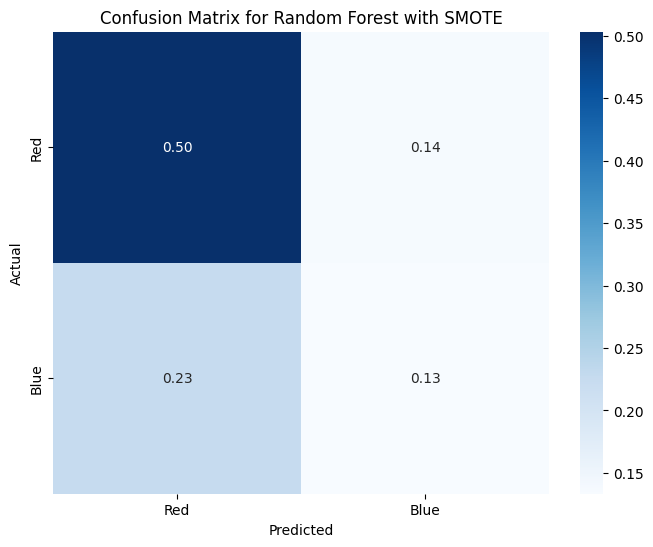

In [65]:
confusion_matrix_data = np.array([[1481, 404], 
                                  [665, 392]])

confusion_matrix_normalized = confusion_matrix_data / np.sum(confusion_matrix_data)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=True)

plt.title('Confusion Matrix for Random Forest with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Red', 'Blue'])
plt.yticks([0.5, 1.5], ['Red', 'Blue'])

plt.show()

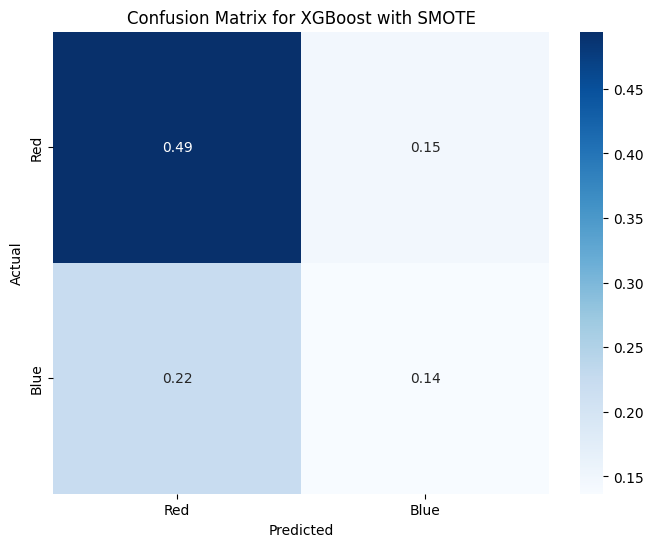

In [66]:
confusion_matrix_data = np.array([[1454, 431], 
                                  [655, 402]])

confusion_matrix_normalized = confusion_matrix_data / np.sum(confusion_matrix_data)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=True)

plt.title('Confusion Matrix for XGBoost with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Red', 'Blue'])
plt.yticks([0.5, 1.5], ['Red', 'Blue'])

plt.show()

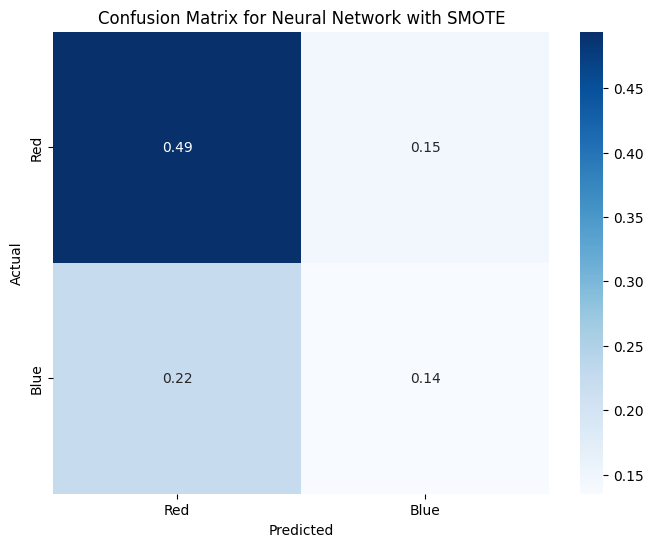

In [68]:
confusion_matrix_data = np.array([[1634, 486], 
                                  [742, 447]])

confusion_matrix_normalized = confusion_matrix_data / np.sum(confusion_matrix_data)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=True)

plt.title('Confusion Matrix for Neural Network with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Red', 'Blue'])
plt.yticks([0.5, 1.5], ['Red', 'Blue'])

plt.show()

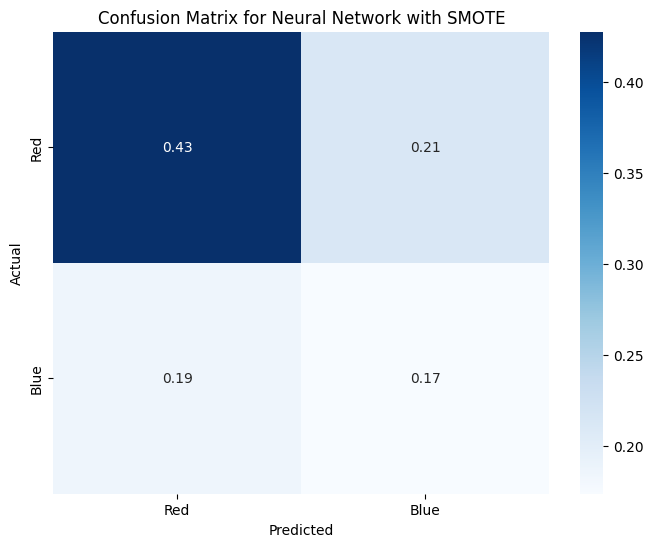

In [69]:
confusion_matrix_data = np.array([[1415, 705], 
                                  [614, 575]])

confusion_matrix_normalized = confusion_matrix_data / np.sum(confusion_matrix_data)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=True)

plt.title('Confusion Matrix for Neural Network with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Red', 'Blue'])
plt.yticks([0.5, 1.5], ['Red', 'Blue'])

plt.show()

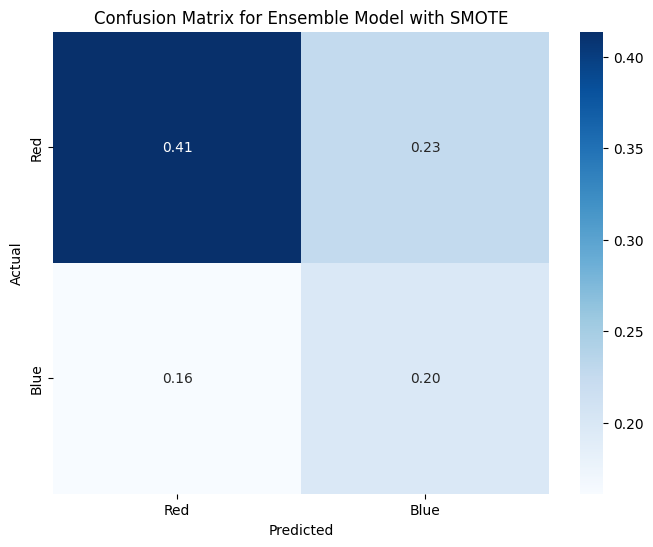

In [70]:
confusion_matrix_data = np.array([[1217, 668], 
                                  [474, 583]])

confusion_matrix_normalized = confusion_matrix_data / np.sum(confusion_matrix_data)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=True)

plt.title('Confusion Matrix for Ensemble Model with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Red', 'Blue'])
plt.yticks([0.5, 1.5], ['Red', 'Blue'])

plt.show()

CONF MAT WITH HYPER PARAM TUNING AND SMOTE
----

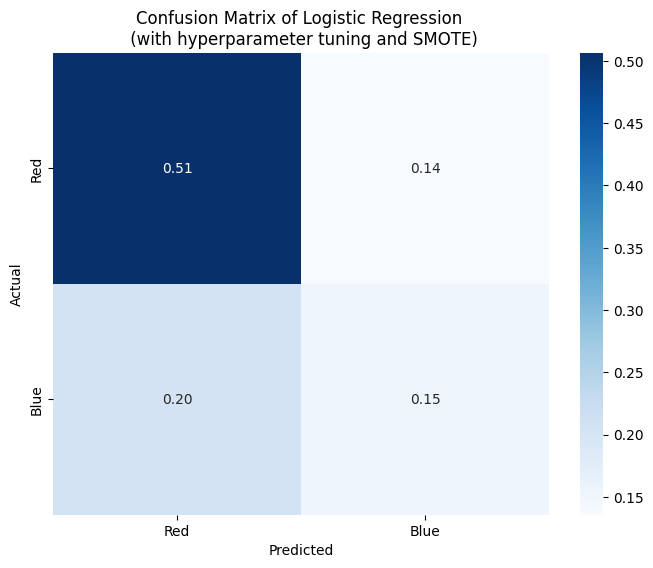

In [74]:
confusion_matrix_data = np.array([[1490, 399], 
                                  [600, 453]])

confusion_matrix_normalized = confusion_matrix_data / np.sum(confusion_matrix_data)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=True)

plt.title('Confusion Matrix of Logistic Regression \n (with hyperparameter tuning and SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Red', 'Blue'])
plt.yticks([0.5, 1.5], ['Red', 'Blue'])

plt.show()

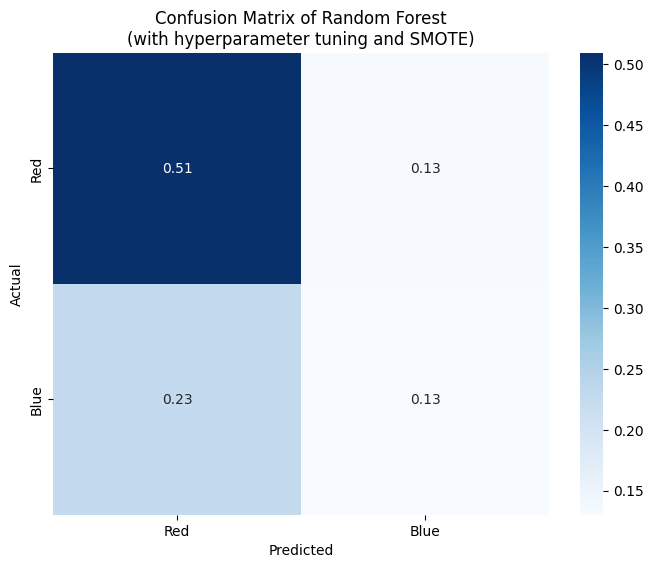

In [76]:
confusion_matrix_data = np.array([[1498, 391], 
                                  [670, 383]])

confusion_matrix_normalized = confusion_matrix_data / np.sum(confusion_matrix_data)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=True)

plt.title('Confusion Matrix of Random Forest\n(with hyperparameter tuning and SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Red', 'Blue'])
plt.yticks([0.5, 1.5], ['Red', 'Blue'])

plt.show()

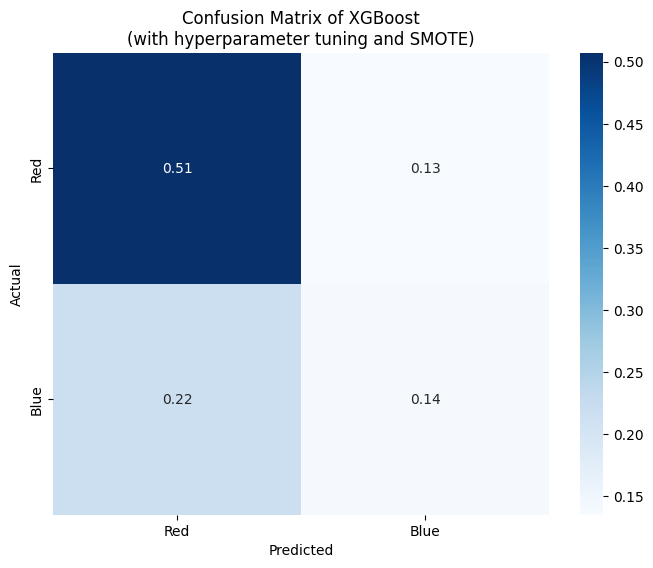

In [77]:
confusion_matrix_data = np.array([[1492, 397], 
                                  [640, 413]])

confusion_matrix_normalized = confusion_matrix_data / np.sum(confusion_matrix_data)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=True)

plt.title('Confusion Matrix of XGBoost\n(with hyperparameter tuning and SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Red', 'Blue'])
plt.yticks([0.5, 1.5], ['Red', 'Blue'])

plt.show()

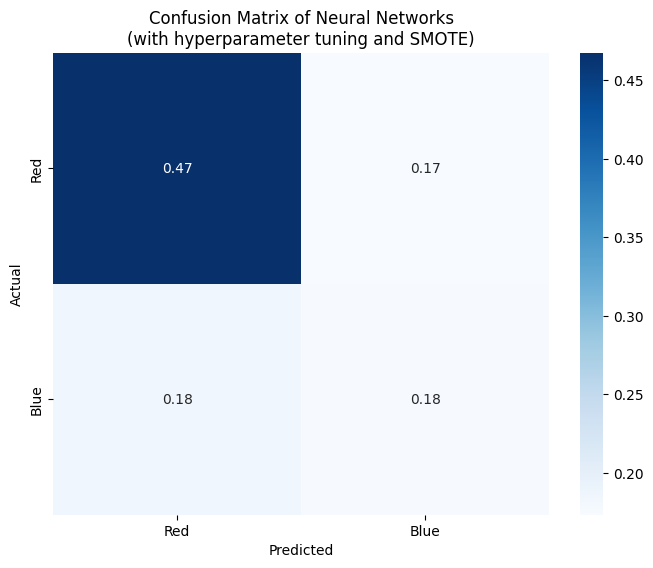

In [78]:

confusion_matrix_data = np.array([[1547, 573], 
                                  [609, 580]])

confusion_matrix_normalized = confusion_matrix_data / np.sum(confusion_matrix_data)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=True)

plt.title('Confusion Matrix of Neural Networks\n(with hyperparameter tuning and SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Red', 'Blue'])
plt.yticks([0.5, 1.5], ['Red', 'Blue'])

plt.show()

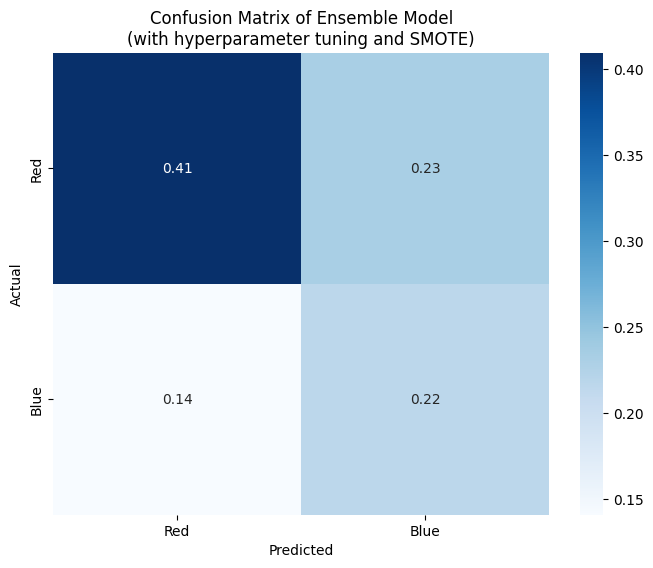

In [79]:
confusion_matrix_data = np.array([[1205, 684], 
                                  [414, 639]])

confusion_matrix_normalized = confusion_matrix_data / np.sum(confusion_matrix_data)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=True)

plt.title('Confusion Matrix of Ensemble Model\n(with hyperparameter tuning and SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Red', 'Blue'])
plt.yticks([0.5, 1.5], ['Red', 'Blue'])

plt.show()